# Gather data sources

In [4]:
from __future__ import print_function
import getopt
import logging
import os
import sys
import tweepy 
import pandas as pd
import json
import requests
from io import StringIO
import datetime
import matplotlib
import numpy as np
import matplotlib.dates as mdates




auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify=True)
end_date = datetime.datetime(2017, 8, 1,0, 0, 0)

archive = pd.read_csv('twitter-archive-enhanced.csv')
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
images = pd.read_csv(StringIO(r.text), sep='\t')

In [5]:
from timeit import default_timer as timer
retweet_and_favourite_count = []
fails_dict = []
with open('tweet_json.txt', mode="w") as file:
    for i in list(archive.tweet_id):
        try:
            tweet = api.get_status(str(i))
            print(i)
            file.write(json.dumps(tweet._json))
            retweet_and_favourite_count.append({
                "tweet_id" : str(i),
                "retweet_count" : tweet._json['retweet_count'],
                "favorite_count" : tweet._json['favorite_count']
                })
        
        except:
            print("Unexpected error:", sys.exc_info()[0])
            fails_dict.append(i)
            pass
            
          


892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
Unexpected error: <class 'tweepy.error.TweepError'>
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
88262727032160256

824025158776213504
823939628516474880
823719002937630720
823699002998870016
823581115634085888
823333489516937216
823322678127919110
823269594223824897
822975315408461824
822872901745569793
822859134160621569
822647212903690241
822610361945911296
822489057087389700
822462944365645825
822244816520155136
822163064745328640
821886076407029760
821813639212650496
821765923262631936
821522889702862852
821421320206483457
821407182352777218
821153421864615936
821149554670182400
821107785811234820
821044531881721856
820837357901512704
820749716845686786
820690176645140481
820494788566847489
820446719150292993
820314633777061888
820078625395449857
820013781606658049
819952236453363712
819924195358416896
819711362133872643
819588359383371776
819347104292290561
819238181065359361
819227688460238848
819015337530290176
819015331746349057
819006400881917954
819004803107983360
818646164899774465
818627210458333184
818614493328580609
818588835076603904
818536468981415936
818307523543449600
818259473185

769695466921623552
769335591808995329
769212283578875904
768970937022709760
768909767477751808
768855141948723200
768609597686943744
768596291618299904
768554158521745409
768473857036525572
768193404517830656
767884188863397888
767754930266464257
767500508068192258
767191397493538821
767122157629476866
766864461642756096
766793450729734144
766714921925144576
766693177336135680
766423258543644672
766313316352462849
766078092750233600
766069199026450432
766008592277377025
765719909049503744
765669560888528897
765395769549590528
765371061932261376
765222098633691136
764857477905154048
764259802650378240
763956972077010945
763837565564780549
763183847194451968
763167063695355904
763103485927849985
762699858130116608
762471784394268675
762464539388485633
762316489655476224
762035686371364864
761976711479193600
761750502866649088
761745352076779520
761672994376806400
761599872357261312
761371037149827077
761334018830917632
761292947749015552
761227390836215808
761004547850530816
760893934457

Rate limit reached. Sleeping for: 708


758828659922702336
758740312047005698
758474966123810816
758467244762497024
758405701903519748
758355060040593408
758099635764359168
758041019896193024
757741869644341248
757729163776290825
757725642876129280
757611664640446465
757597904299253760
757596066325864448
757400162377592832
757393109802180609
757354760399941633
756998049151549440
756939218950160384
756651752796094464
756526248105566208
756303284449767430
756288534030475264
756275833623502848
755955933503782912
755206590534418437
755110668769038337
754874841593970688
754856583969079297
754747087846248448
754482103782404096
754449512966619136
754120377874386944
Unexpected error: <class 'tweepy.error.TweepError'>
753655901052166144
753420520834629632
753398408988139520
753375668877008896
753298634498793472
753294487569522689
753039830821511168
753026973505581056
752932432744185856
752917284578922496
752701944171524096
752682090207055872
752660715232722944
752568224206688256
752519690950500352
752334515931054080
75230939457087897

705898680587526145
705786532653883392
705591895322394625
705475953783398401
705442520700944385
705428427625635840
705239209544720384
705223444686888960
705102439679201280
705066031337840642
704871453724954624
704859558691414016
704847917308362754
704819833553219584
704761120771465216
704499785726889984
704491224099647488
704480331685040129
704364645503647744
704347321748819968
704134088924532736
704113298707505153
704054845121142784
703774238772166656
703769065844768768
703631701117943808
703611486317502464
703425003149250560
703407252292673536
703382836347330562
703356393781329922
703268521220972544
703079050210877440
703041949650034688
702932127499816960
702899151802126337
702684942141153280
702671118226825216
702598099714314240
702539513671897089
702332542343577600
702321140488925184
702276748847800320
702217446468493312
701981390485725185
701952816642965504
701889187134500865
701805642395348998
701601587219795968
701570477911896070
701545186879471618
701214700881756160
700890391244

678740035362037760
678708137298427904
678675843183484930
678643457146150913
678446151570427904
678424312106393600
678410210315247616
678399652199309312
678396796259975168
678389028614488064
678380236862578688
678341075375947776
678334497360859136
678278586130948096
678255464182861824
678023323247357953
678021115718029313
677961670166224897
677918531514703872
677895101218201600
677716515794329600
677700003327029250
677698403548192770
677687604918272002
677673981332312066
677662372920729601
677644091929329666
677573743309385728
677565715327688705
677557565589463040
677547928504967168
677530072887205888
677335745548390400
677334615166730240
677331501395156992
677328882937298944
677314812125323265
677301033169788928
677269281705472000
677228873407442944


Rate limit reached. Sleeping for: 710


677187300187611136
676975532580409345
676957860086095872
676949632774234114
676948236477857792
676946864479084545
676942428000112642
676936541936185344
676916996760600576
676897532954456065
676864501615042560
676821958043033607
676819651066732545
676811746707918848
676776431406465024
676617503762681856
676613908052996102
676606785097199616
676603393314578432
676593408224403456
676590572941893632
676588346097852417
676582956622721024
676575501977128964
676533798876651520
676496375194980353
676470639084101634
676440007570247681
676430933382295552
676263575653122048
676237365392908289
676219687039057920
676215927814406144
676191832485810177
676146341966438401
676121918416756736
676101918813499392
676098748976615425
676089483918516224
675898130735476737
675891555769696257
675888385639251968
675878199931371520
675870721063669760
675853064436391936
675849018447167488
675845657354215424
675822767435051008
675820929667219457
675798442703122432
675781562965868544
675740360753160193
675710890956

668221241640230912
668204964695683073
668190681446379520
668171859951755264
668154635664932864
668142349051129856
668113020489474048
667937095915278337
667924896115245057
667915453470232577
667911425562669056
667902449697558528
667886921285246976
667885044254572545
667878741721415682
667873844930215936
667866724293877760
667861340749471744
667832474953625600
667806454573760512
667801013445750784
667793409583771648
667782464991965184
667773195014021121
667766675769573376
667728196545200128
667724302356258817
667550904950915073
667550882905632768
667549055577362432
667546741521195010
667544320556335104
667538891197542400
667534815156183040
667530908589760512
667524857454854144
667517642048163840
667509364010450944
667502640335572993
667495797102141441
667491009379606528
667470559035432960
667455448082227200
667453023279554560
667443425659232256
667437278097252352
667435689202614272
667405339315146752
667393430834667520
667369227918143488
667211855547486208
667200525029539841
667192066997

In [7]:
retweet_and_favourite = pd.DataFrame(retweet_and_favourite_count, columns=["tweet_id",'retweet_count', 'favorite_count'])
retweet_and_favourite['tweet_id'] =retweet_and_favourite['tweet_id'].astype(str).astype(int)


# Make copies of each data set as clean ones so that we do not change the original data set but our own

In [8]:
retweet_clean = retweet_and_favourite.copy()
archive_clean = archive.copy()
images_clean = images.copy()

# Quality issue 2
Define - We do not want to look at retweets or replies so these can be deleted. These have a lot of missing values too. 

In [9]:
#Code
#we do not want retweets - so therefore delete all retweets rows and then delete the columns to do with retweets
#I did this by seeing which rows had null values in these columns as these are the non retweets
#also the columns about who they are replying to as this is irrelevant

archive_clean = archive[archive['retweeted_status_id'].isnull()]
archive_clean = archive[archive['retweeted_status_user_id'].isnull()]
archive_clean = archive[archive['retweeted_status_timestamp'].isnull()]
archive_clean = archive[archive['retweeted_status_timestamp'].isnull()]
archive_clean = archive.drop(columns =['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])


In [10]:
#Test
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


# Quality issue 3
Define - I wanted to see if there were or duplicates. There were no duplicates. Remove rows where expanded urls are Nan as this is missing data.

In [11]:
#code
retweet_clean.info()
retweet_clean.drop_duplicates()


archive_clean = archive_clean.drop_duplicates(subset='tweet_id', keep='first')
archive_clean['expanded_urls'] = pd.notna(archive_clean['expanded_urls'])

images_clean.info()
images_clean = images_clean.drop_duplicates(subset='tweet_id', keep='first')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-nu

# Quality issue 4
Define - I wanted to see if there was any missing data. Remove rows where expanded urls are Nan as this is missing data.

In [12]:
archive_clean.info()
archive_clean['expanded_urls'] = pd.notna(archive_clean['expanded_urls'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2356 non-null   bool  
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: bool(1), int64(3), object(8)
memory usage: 223.2+ KB


In [13]:
#test
print(retweet_clean)
archive_clean.info()
print(images_clean)

                tweet_id  retweet_count  favorite_count
0     892420643555336193           7406           35129
1     892177421306343426           5515           30402
2     891815181378084864           3638           22856
3     891689557279858688           7586           38409
4     891327558926688256           8159           36663
...                  ...            ...             ...
2326  666049248165822465             38              94
2327  666044226329800704            122             261
2328  666033412701032449             39             107
2329  666029285002620928             41             117
2330  666020888022790149            445            2350

[2331 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2  

# Tidyness issue 1 -
DefineHaving 3 sources of data is untidy so I wanted to merge them. All 3 sources had tweet id as a common column so I merged on this.


In [14]:
#code
#merge images and archive. Using inner deletes all the tweet_ids not in both and therefore with lots of NaN
alldata = pd.merge(archive_clean, images_clean, on = 'tweet_id')

#merge together using inner to get rid of tweet_id's that do not exist over all 3 sources
all3data = pd.merge(alldata, retweet_clean, on = 'tweet_id')

In [15]:
#test
all3data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2059 non-null   int64  
 1   timestamp           2059 non-null   object 
 2   source              2059 non-null   object 
 3   text                2059 non-null   object 
 4   expanded_urls       2059 non-null   bool   
 5   rating_numerator    2059 non-null   int64  
 6   rating_denominator  2059 non-null   int64  
 7   name                2059 non-null   object 
 8   doggo               2059 non-null   object 
 9   floofer             2059 non-null   object 
 10  pupper              2059 non-null   object 
 11  puppo               2059 non-null   object 
 12  jpg_url             2059 non-null   object 
 13  img_num             2059 non-null   int64  
 14  p1                  2059 non-null   object 
 15  p1_conf             2059 non-null   float64
 16  p1_dog

# Quality issue 1 - 
I decided to merge them using inner merge so that rows with missing values will automatically be dropped

In [16]:
#code
#merge images and archive. Using inner deletes all the tweet_ids not in both and therefore with lots of NaN
alldata = pd.merge(archive_clean, images_clean, how='inner', on = 'tweet_id')

#merge together using inner to get rid of tweet_id's that do not exist over all 3 sources
all3data = pd.merge(alldata, retweet_clean, how='inner', on = 'tweet_id')

In [17]:
#test

all3data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2059 non-null   int64  
 1   timestamp           2059 non-null   object 
 2   source              2059 non-null   object 
 3   text                2059 non-null   object 
 4   expanded_urls       2059 non-null   bool   
 5   rating_numerator    2059 non-null   int64  
 6   rating_denominator  2059 non-null   int64  
 7   name                2059 non-null   object 
 8   doggo               2059 non-null   object 
 9   floofer             2059 non-null   object 
 10  pupper              2059 non-null   object 
 11  puppo               2059 non-null   object 
 12  jpg_url             2059 non-null   object 
 13  img_num             2059 non-null   int64  
 14  p1                  2059 non-null   object 
 15  p1_conf             2059 non-null   float64
 16  p1_dog

# Quality issue 5-
define The names column had several names that were not names so this would have to be looked at too. I will look at the names that are lower case and then drop them if not names.

In [18]:
#code
#Looking at the name column - looks as though some aren't names. I will look at the ones not in capitals
lower = all3data['name'].str.islower()
lowerall = all3data[lower]
lowerindex = lowerall.index

all3data = all3data.drop(lowerindex) 


In [19]:
#test
all3data['name'].value_counts()

None       573
Charlie     10
Penny       10
Cooper      10
Tucker      10
          ... 
Dallas       1
Kawhi        1
Caryl        1
Rupert       1
Ziva         1
Name: name, Length: 912, dtype: int64

# Quality issue 6 and tidiness issue 3:
define - The column headers p1,p2 etc were very vague so these need to be changed.The column names were changed to Guess 1 etc to make it more readable. Also the conf and img_num columns need to be dropped as I realised that the probability columns were not that relevant as only the true or false was.

In [20]:
#code
all3data = all3data.rename(columns={'p1': 'Guess_1', 'p2': 'Guess_2', 'p3': 'Guess_3','p1_dog': 'Guess_1-T/F', 'p2_dog': 'Guess_2-T/F','p3_dog': 'Guess_3-T/F' })
all3data = all3data.drop(columns =['p1_conf', 'p2_conf', 'p3_conf', 'img_num']) 

In [21]:
#test
all3data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1959 entries, 0 to 2058
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1959 non-null   int64 
 1   timestamp           1959 non-null   object
 2   source              1959 non-null   object
 3   text                1959 non-null   object
 4   expanded_urls       1959 non-null   bool  
 5   rating_numerator    1959 non-null   int64 
 6   rating_denominator  1959 non-null   int64 
 7   name                1959 non-null   object
 8   doggo               1959 non-null   object
 9   floofer             1959 non-null   object
 10  pupper              1959 non-null   object
 11  puppo               1959 non-null   object
 12  jpg_url             1959 non-null   object
 13  Guess_1             1959 non-null   object
 14  Guess_1-T/F         1959 non-null   bool  
 15  Guess_2             1959 non-null   object
 16  Guess_2-T/F         1959

# Tidiness issue 2:
 define -The source column was taking up too much room in the table so I will look into this.I looked at the sources column and there were only 3 types of sources. Therefore I changed the names to shorter and more legible names.

In [22]:
#code
all3data['source'].value_counts()
sources = {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for iphone','<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':'Twitter Web Client','<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'}
all3data = all3data.replace(sources)

In [23]:
#test
#check to see if the changes worked
all3data['source'].value_counts(normalize=True)

Twitter for iphone    0.981623
Twitter Web Client    0.013783
TweetDeck             0.004594
Name: source, dtype: float64

# Quality issue 7: 
    define - Timestamp had seconds and minutes which I did not think was relevant and was an object not a date time.Timestamp was changed to a datetime and the time was removed as I felt that the date was relevant and not the time.

In [24]:
#code
#tidy up the timestamp - do not need the hour - just the date
all3data['timestamp']= pd.to_datetime(all3data['timestamp']).dt.date


In [25]:
#test
all3data.info()
all3data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1959 entries, 0 to 2058
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1959 non-null   int64 
 1   timestamp           1959 non-null   object
 2   source              1959 non-null   object
 3   text                1959 non-null   object
 4   expanded_urls       1959 non-null   bool  
 5   rating_numerator    1959 non-null   int64 
 6   rating_denominator  1959 non-null   int64 
 7   name                1959 non-null   object
 8   doggo               1959 non-null   object
 9   floofer             1959 non-null   object
 10  pupper              1959 non-null   object
 11  puppo               1959 non-null   object
 12  jpg_url             1959 non-null   object
 13  Guess_1             1959 non-null   object
 14  Guess_1-T/F         1959 non-null   bool  
 15  Guess_2             1959 non-null   object
 16  Guess_2-T/F         1959

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,puppo,jpg_url,Guess_1,Guess_1-T/F,Guess_2,Guess_2-T/F,Guess_3,Guess_3-T/F,retweet_count,favorite_count
0,892420643555336193,2017-08-01,Twitter for iphone,This is Phineas. He's a mystical boy. Only eve...,True,13,10,Phineas,None,None,...,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,False,bagel,False,banana,False,7406,35129
1,892177421306343426,2017-08-01,Twitter for iphone,This is Tilly. She's just checking pup on you....,True,13,10,Tilly,None,None,...,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,True,Pekinese,True,papillon,True,5515,30402
2,891815181378084864,2017-07-31,Twitter for iphone,This is Archie. He is a rare Norwegian Pouncin...,True,12,10,Archie,None,None,...,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,True,malamute,True,kelpie,True,3638,22856
3,891689557279858688,2017-07-30,Twitter for iphone,This is Darla. She commenced a snooze mid meal...,True,13,10,Darla,None,None,...,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,False,Labrador_retriever,True,spatula,False,7586,38409
4,891327558926688256,2017-07-29,Twitter for iphone,This is Franklin. He would like you to stop ca...,True,12,10,Franklin,None,None,...,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,True,English_springer,True,German_short-haired_pointer,True,8159,36663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,666082916733198337,2015-11-16,Twitter for iphone,Here we have a well-established sunblockerspan...,True,6,10,None,None,None,...,None,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,pug,True,bull_mastiff,True,French_bulldog,True,41,101
2046,666073100786774016,2015-11-16,Twitter for iphone,Let's hope this flight isn't Malaysian (lol). ...,True,10,10,None,None,None,...,None,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,Walker_hound,True,English_foxhound,True,Ibizan_hound,True,140,282
2047,666071193221509120,2015-11-16,Twitter for iphone,Here we have a northern speckled Rhododendron....,True,9,10,None,None,None,...,None,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,Gordon_setter,True,Yorkshire_terrier,True,Pekinese,True,52,134
2054,666049248165822465,2015-11-16,Twitter for iphone,Here we have a 1949 1st generation vulpix. Enj...,True,5,10,None,None,None,...,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,True,Rottweiler,True,Doberman,True,38,94


# Quality issue 8:
    define - Dog rating was over 2 columns so this will have to be looked at and merged. Also assessed to see if any of the ratings were wrong. I made it so that the denominator was 10 as any bigger it seemed that there were more than 1 dog in the photo. Therefore the rows that were not 10 were deleted. I then dropped the denominator row as if they were all 10 then it was not needed and renamed the numerator column to dog rating.


In [26]:
#code
#Drop rating_denominator and rename rating_numerator to rating - I 
#saw on the info that most people give a score more than 10 out of 10. 
#Therefore I dropped the denominator and renamed the numerator

equals10 = archive['rating_denominator'] == 10
archive = archive[equals10]
archive = archive.drop(columns =['rating_denominator']) 
archive = archive.rename(columns={'rating_numerator': "dog_rating (/10)"})
archive['dog_rating (/10)'].value_counts()
#looked at the ratings - some are really high. I checked the highest which is 1776 and this is actually the rating someone gave their dog so I kept it


12      558
11      463
10      461
13      351
9       156
8       102
7        54
14       54
5        37
6        32
3        19
4        15
2         9
1         8
0         2
15        2
75        2
420       2
666       1
182       1
26        1
17        1
27        1
1776      1
Name: dog_rating (/10), dtype: int64

In [27]:
#test
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2333 non-null   int64  
 1   in_reply_to_status_id       73 non-null     float64
 2   in_reply_to_user_id         73 non-null     float64
 3   timestamp                   2333 non-null   object 
 4   source                      2333 non-null   object 
 5   text                        2333 non-null   object 
 6   retweeted_status_id         180 non-null    float64
 7   retweeted_status_user_id    180 non-null    float64
 8   retweeted_status_timestamp  180 non-null    object 
 9   expanded_urls               2278 non-null   object 
 10  dog_rating (/10)            2333 non-null   int64  
 11  name                        2333 non-null   object 
 12  doggo                       2333 non-null   object 
 13  floofer                     2333 

# Quality issue 9-
define - The dog stages were over 4 different columns - these will have to be made into one dog stage column.  I then merged the columns into one dog_stage column to make it more succinct. This also made the table more tidy.


In [28]:
#code

all3data["dog_stage"] = archive["doggo"] + archive["pupper"] +archive['puppo']

all3data = all3data.drop(columns =['doggo', 'pupper', 'puppo']) 
#change the type of dog
d = {'NoneNoneNone':'None','NonepupperNone':'Pupper','doggoNoneNone': 'Doggo' , 'NoneNonepuppo': 'Puppo'}
all3data = all3data.replace(d)

In [29]:
#looked at the text of doggopupperNone - all included more than one dog / dog type so will remove these as not accurate
mixed = all3data['dog_stage'] == 'doggopupperNone'
mixed1 = all3data[mixed]
mixedind = mixed1.index
all3data = all3data.drop(mixedind) 

#looked at the text of doggoNonepuppo - only one. It should be puppo, so change to puppo
d1 = {'doggoNonepuppo':'Puppo'}
all3data = all3data.replace(d1)


In [30]:
#test
all3data['dog_stage'].value_counts()

None      1581
Pupper     234
Doggo       82
Puppo       30
Name: dog_stage, dtype: int64

# Quality issue 10 -
I  dropped the floofer column as this is not a dog stage.

In [31]:
#code
#remove floofer seeing as it is not a stage of dog - just shows if the dog is fluffy
all3data = all3data.drop(columns =['floofer']) 


In [32]:
#test
all3data['dog_stage'].value_counts()

None      1581
Pupper     234
Doggo       82
Puppo       30
Name: dog_stage, dtype: int64

# Different plots to see what correlates

<AxesSubplot:title={'center':'Dog stages vs amount of tweets'}>

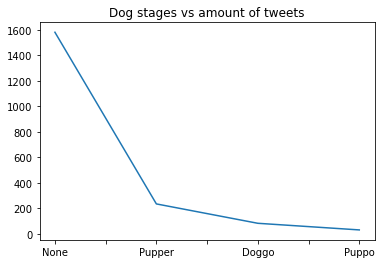

In [33]:
dogstages = all3data['dog_stage'].value_counts()

dogstages.plot(title = 'Dog stages vs amount of tweets')

In [34]:
#I wanted to see the correlations
all3data.corr(method='spearman')



,tweet_id,expanded_urls,rating_numerator,rating_denominator,Guess_1-T/F,Guess_2-T/F,Guess_3-T/F,retweet_count,favorite_count
tweet_id,1.000000,NaN,0.607062,-0.017737,0.129997,0.127229,0.097677,0.750272,0.751226
expanded_urls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating_numerator,0.607062,NaN,1.000000,0.077079,0.210928,0.168050,0.164732,0.525055,0.506378
rating_denominator,-0.017737,NaN,0.077079,1.000000,0.018706,0.030459,0.020785,-0.002604,0.004420
Guess_1-T/F,0.129997,NaN,0.210928,0.018706,1.000000,0.633455,0.559764,0.067374,0.097151
Guess_2-T/F,0.127229,NaN,0.168050,0.030459,0.633455,1.000000,0.546848,0.081240,0.105056
Guess_3-T/F,0.097677,NaN,0.164732,0.020785,0.559764,0.546848,1.000000,0.029793,0.066479
retweet_count,0.750272,NaN,0.525055,-0.002604,0.067374,0.081240,0.029793,1.000000,0.836628
favorite_count,0.751226,NaN,0.506378,0.004420,0.097151,0.105056,0.066479,0.836628,1.000000


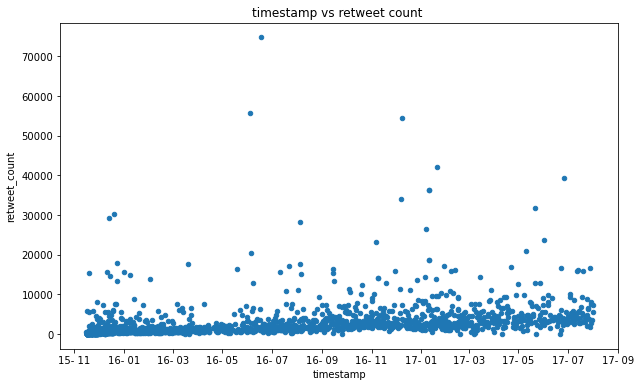

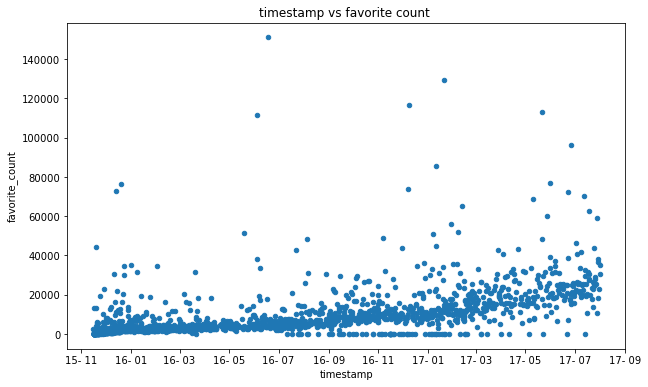

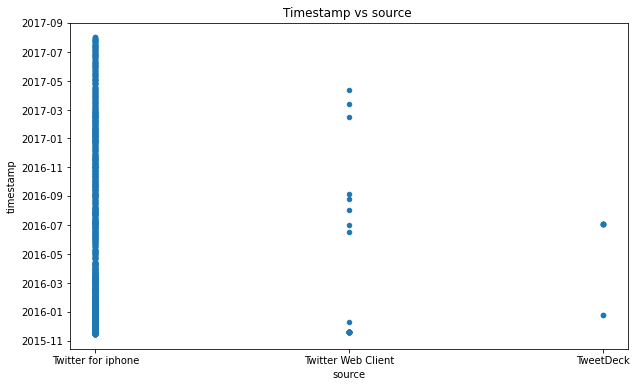

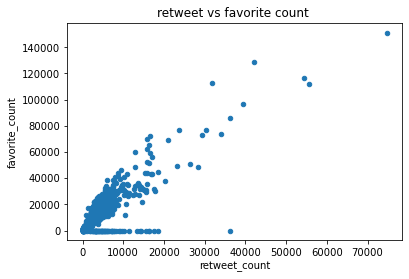

In [35]:
all32 = all3data.plot.scatter(x='timestamp', y='retweet_count', title='timestamp vs retweet count ', figsize=(10, 6))
all32.xaxis.set_major_formatter(mdates.DateFormatter('%y- %m')) 


all92 = all3data.plot.scatter(x='timestamp', y='favorite_count', title='timestamp vs favorite count ',figsize=(10, 6))
all92.xaxis.set_major_formatter(mdates.DateFormatter('%y- %m')) 


all22 = all3data.plot.scatter(y='timestamp', x='source', title='Timestamp vs source ',figsize=(10, 6))

ret_fav = all3data.plot.scatter(y='favorite_count', x='retweet_count', title='retweet vs favorite count ')

In [36]:
all3data.to_csv('twitter_archive_master.csv', index=False)